In [2]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('student_clustering.csv')
print("The shape of data is",df.shape)
df.head()

The shape of data is (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


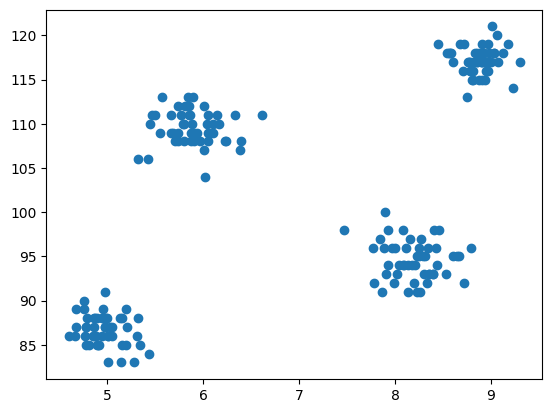

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])

In [10]:
from sklearn.cluster import KMeans

In [12]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

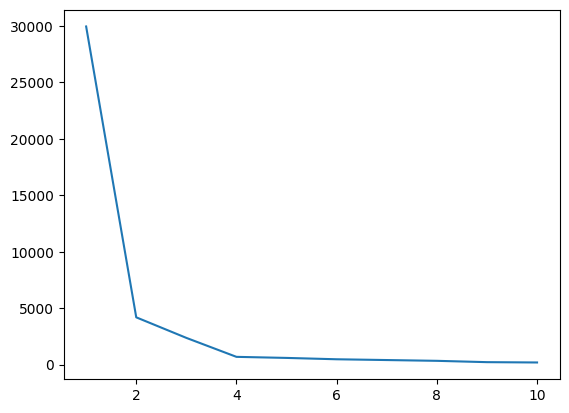

In [14]:
plt.plot(range(1,11),wcss)

In [16]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

In [18]:
X[y_means == 3,1]

array([115., 119., 117., 118., 118., 116., 116., 119., 116., 115., 115.,
       117., 118., 113., 116., 118., 117., 121., 116., 117., 117., 117.,
       114., 118., 118., 119., 118., 118., 117., 118., 117., 119., 118.,
       118., 117., 117., 117., 116., 118., 119., 117., 119., 120., 117.,
       115., 115., 117., 116., 118., 117.])

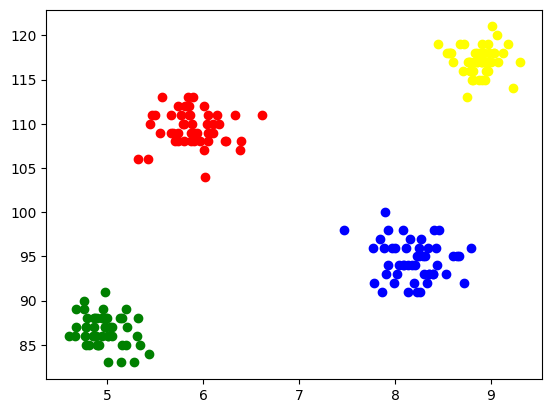

In [20]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

# K-Means on 3-D Data

In [23]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

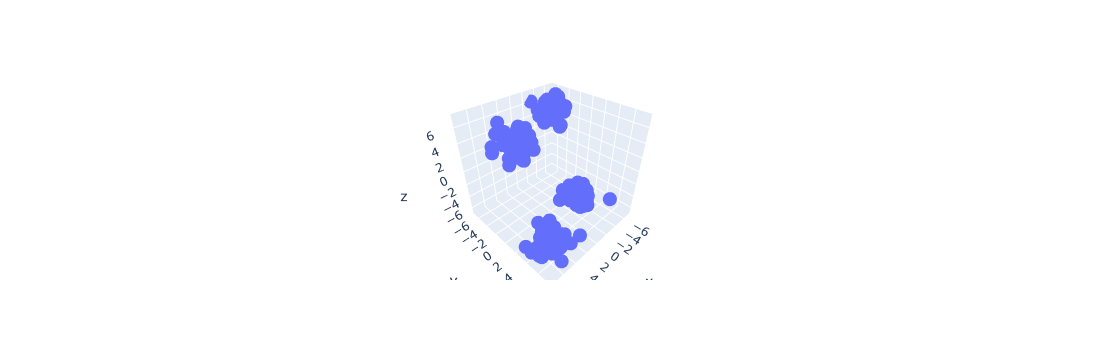

In [29]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [31]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

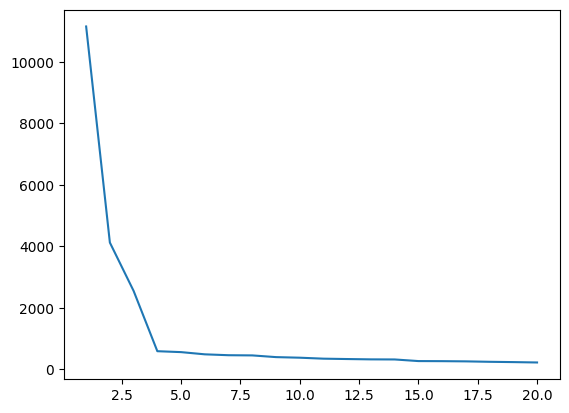

In [33]:
plt.plot(range(1,21),wcss)

In [35]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [37]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

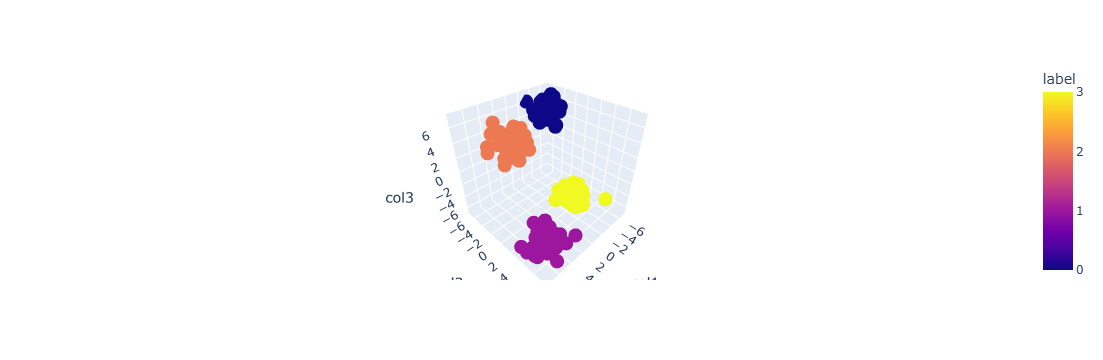

In [39]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()